In [24]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
import spotipy.util as util
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [25]:
client_credentials_manager = SpotifyClientCredentials(client_id='be9b36b0f0fd4ade981b41afca0fa57e',
                                                      client_secret='87e23dc018ec487bb2689a7741aa013')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [26]:
user = 'juliaporphirio'
playlist_id = '5KKOTbl1fyNRS4LECmZpvu'
client_id='25cfec198a224bec9d819dd78f3b7ae3'
client_secret='a76cbbe7e9ec4e3db312aa2652f73caf'
#scope = #'playlist-read-private user-read-private user-read-email' 
scope = 'user-follow-read user-top-read user-read-private user-read-birthdate user-read-email playlist-read-private user-library-read user-library-modify user-read-playback-state user-read-currently-playing user-modify-playback-state user-read-recently-played'


## Pegar autenticação do usuário

In [33]:
username = 'juliaporphirio'

In [34]:
token = util.prompt_for_user_token(username,scope,client_id=client_id,client_secret=client_secret,redirect_uri='http://localhost:1410/')

if token:
    sp = spotipy.Spotify(auth=token)
    sp.trace = False
    results = sp.current_user_playlists(limit=50)
else:
    print("Can't get token for", username)

# Top artistas  

### Base features das top  musicas do usuario

In [37]:
top_musicas = sp.current_user_top_tracks(limit=100)
track_id = []
for i, t in enumerate(top_musicas['items']):
    track_id.append(top_musicas['items'][i]['id'])

In [36]:
list_usuario=[]
for i in track_id:
    list_usuario.append(sp.audio_features([i])[0])

In [38]:
def criacao_features(lista_tracks):
    features_list = []
    for features in lista_tracks:
        features_list.append([features['energy'], features['liveness'],
        features['tempo'], features['speechiness'],
        features['acousticness'], features['instrumentalness'],
        features['time_signature'], features['danceability'],
        features['key'], features['duration_ms'],
        features['loudness'], features['valence'],
        features['mode'], features['type'],
        features['uri']])

    df_features = pd.DataFrame(lista_tracks, columns=['energy', 'liveness',
    'tempo', 'speechiness',
    'acousticness', 'instrumentalness',
    'time_signature', 'danceability',
    'key', 'duration_ms', 'loudness',
    'valence', 'mode', 'type', 'uri'])
    return(df_features)

In [39]:
df_features_usuario = criacao_features(list_usuario)
df_features_usuario.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,0.483,0.696,140.154,0.0356,0.1300,0.000028,4,0.619,0,269680,-11.802,0.661,0,audio_features,spotify:track:4Gp6ZP2UFewXp8ltxy7wHa
1,0.366,0.718,136.863,0.0429,0.1310,0.000208,3,0.594,5,308093,-14.071,0.317,0,audio_features,spotify:track:6Y2f6vVRhJJvUCQosrEtp4
2,0.423,0.959,79.305,0.4900,0.8830,0.000000,4,0.431,1,99147,-18.125,0.384,0,audio_features,spotify:track:5cuxD12d736DclguQ3gOOV
3,0.463,0.698,79.971,0.0359,0.0345,0.018400,4,0.505,7,269280,-11.688,0.630,1,audio_features,spotify:track:3G0A1OVJn8xZKD5WT2b9JM
4,0.253,0.701,144.027,0.0324,0.6980,0.002950,4,0.701,0,252307,-15.048,0.322,1,audio_features,spotify:track:36PPMKQMB5k1EytQ0IFoAf


In [40]:
df_features_usuario.to_csv('df_features_usuario.csv')

### Base features das top 50 musicas spotify

In [41]:
track_results = sp.user_playlist(username, playlist_id='37i9dQZF1DX9qNs32fujYe')

In [42]:
track_id_outros = []

for i, t in enumerate(track_results['tracks']['items']):
    track_id_outros.append(t['track']['id'])

In [43]:
list_outros=[]
for i in track_id_outros:
    list_outros.append(sp.audio_features([i])[0])

In [44]:
df_features_outros = criacao_features(list_outros)
df_features_outros.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,type,uri
0,0.950,0.374,154.224,0.0829,0.003730,0.000212,4,0.287,10,259093,-6.643,0.3570,0,audio_features,spotify:track:3sCzuYAdWcGhukBtxjdr6P
1,0.895,0.404,139.989,0.0364,0.000023,0.522000,4,0.495,1,264500,-7.805,0.5390,1,audio_features,spotify:track:3ku4neMM3KIhFXhPaPZU7A
2,0.641,0.116,140.501,0.0314,0.011600,0.009530,4,0.332,4,359238,-6.382,0.0504,0,audio_features,spotify:track:3ArY0OnRj46Qb7UIpjrKKy
3,0.993,0.320,129.981,0.0819,0.000081,0.311000,4,0.520,6,354069,-4.634,0.2860,1,audio_features,spotify:track:5OYFxF01HsmmGHBtoCKYN9
4,0.930,0.235,96.495,0.0452,0.001340,0.000005,4,0.545,10,218615,-3.406,0.5190,0,audio_features,spotify:track:63fBEvbvxbSwVOOPS9Ik4l


In [45]:
df_features_outros.to_csv('df_features_outros.csv')

# Bases recomendacao

In [46]:
df_features_usuario = df_features_usuario[['energy', 'liveness', 'tempo', 'speechiness', 'acousticness','instrumentalness',  'danceability',  'duration_ms']]
#df_features_usuario['y'] = 1

In [47]:
df_total = df_features_usuario.copy()
df_total.shape

(50, 8)

In [48]:
cols = ['energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'danceability', 'duration_ms']

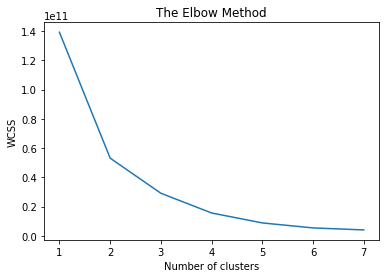

In [49]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_total)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Para n_clusters = 3 , a média do coeficiente de  silhueta é : 0.5953830310953033


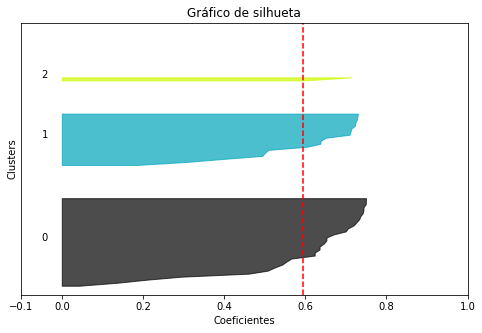

Para n_clusters = 4 , a média do coeficiente de  silhueta é : 0.5315961614720053


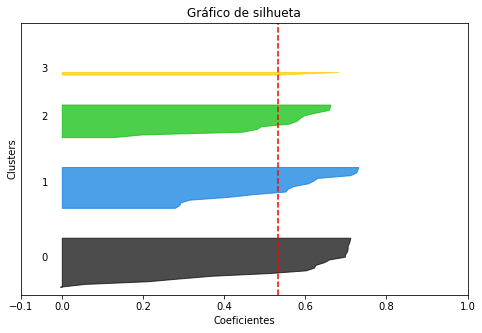

Para n_clusters = 5 , a média do coeficiente de  silhueta é : 0.5602201612123652


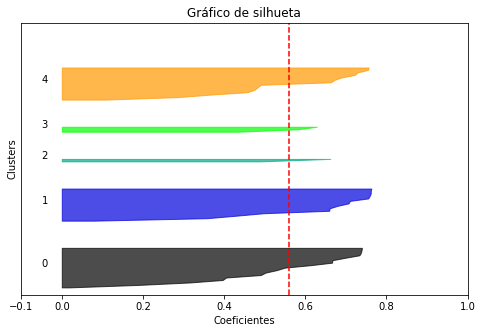

In [50]:
# Utilizando o coeficiente de silhueta para avaliar a qualidade dos clusters
# https://en.wikipedia.org/wiki/Silhouette_(clustering)

X = df_total.copy()

range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(8,5)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # O coeficiente de silhueta mede a dissimilaridade média do objeto i em relação a
    # todos os outros objetos do seu cluster e aos outros cluters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          ", a média do coeficiente de  silhueta é :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 3
    for i in range(n_clusters):
        # agregando o coeficiente de cada amostra de um cluster e ordenando-as
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
                
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Calculando o y do próximo cluster
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silhueta")
    ax1.set_xlabel("Coeficientes")
    ax1.set_ylabel("Clusters")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    plt.show()

# modelagem

In [51]:
df_total.columns

Index(['energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'danceability', 'duration_ms'],
      dtype='object')

In [103]:
model = KMeans(n_clusters=5).fit(df_total)

In [104]:
df_total['cluster'] = model.predict(df_total)

In [105]:
df_total.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,cluster
0,0.483,0.696,140.154,0.0356,0.1300,0.000028,0.619,269680,1
1,0.366,0.718,136.863,0.0429,0.1310,0.000208,0.594,308093,4
2,0.423,0.959,79.305,0.4900,0.8830,0.000000,0.431,99147,2
3,0.463,0.698,79.971,0.0359,0.0345,0.018400,0.505,269280,1
4,0.253,0.701,144.027,0.0324,0.6980,0.002950,0.701,252307,1


In [106]:
#classificação
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 

In [107]:
X = np.array(df_total.iloc[:,:-1])
y = np.array(df_total['cluster'])

In [108]:
np.array(df_total['cluster'])

array([1, 4, 2, 1, 1, 1, 0, 3, 3, 1, 4, 0, 0, 3, 4, 3, 0, 0, 3, 1, 1, 1,
       1, 3, 0, 0, 3, 0, 0, 3, 0, 1, 1, 3, 3, 1, 0, 0, 0, 0, 3, 3, 2, 1,
       1, 3, 3, 3, 3, 3])

In [109]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [110]:
#fernanda lemos
df_fernanda = criacao_features(sp.audio_features('1Qpe9vt81I6mQzicGBu3vj'))

In [111]:
clf.predict_proba(df_fernanda[cols])

array([[0., 1., 0., 0., 0.]])

In [112]:
#laura zenner
df_laura = criacao_features(sp.audio_features('6gAlsxCNtNrpKrNZ1tltWZ'))

In [113]:
clf.predict_proba(df_laura[cols])

array([[0., 0., 0., 1., 0.]])